In [1]:
#Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [6]:
#load data, change directory to your corresponding directories
#tag = pd.read_csv("C:/Users/cos00/Desktop/Nuclear/APAN5900/Tag Data JG.csv")
tag = pd.read_csv("~Users⁩/conggeorgesun/Desktop⁩/APAN5900/Tag Data JG.csv")

FileNotFoundError: File b'~Users\xe2\x81\xa9/conggeorgesun/Desktop\xe2\x81\xa9/APAN5900/Tag Data JG.csv' does not exist

In [1]:
np.shape(tag) #dimension

NameError: name 'np' is not defined

In [4]:
tag.describe()  #summary of tag data

POWDER_MI_N_RESULT     P1:FC70104     P1:FC70113     P1:FC70116  \
count         1285.000000  474780.000000  474780.000000  474780.000000   
mean             4.540821   42566.267520      90.603056   37534.418031   
std              3.065154   10658.907868     108.817466   17638.683105   
min              0.709000       0.000000       0.000000       0.000000   
25%              3.380000   41723.002000       0.999998   28701.608250   
50%              3.780000   45703.427500       9.985807   39237.012000   
75%              4.450000   48067.617000     179.993150   49363.353250   
max             36.070000   54140.277000     854.803280  119999.940000   

          P1:FC70117     P1:FC70120     P1:FC70121     P1:FC70302  \
count  474780.000000  474780.000000  474780.000000  474780.000000   
mean    13756.997247    6971.572492    6791.592072   77032.428407   
std      4896.968277    1653.538575    1637.111213   30418.941971   
min         0.000000       0.000000       0.000000       0.000000   
25%      9939.597900    6967.669800    6922.981175   61954.540250   
50%     13275.303000    7082.420400    7059.809350   81876.031500   
75%     17846.241000    7520.302400    7453.380625   97682.049000   
max     44732.734000   13357.232000   18000.000000  189885.800000   

       P1:Fc70302.AOT     P1:FC70309      ...           P1:TR70104  \
count   474780.000000  474948.000000      ...        474780.000000   
mean        49.605938   50022.377752      ...           179.524201   
std         16.071910   12837.758455      ...            16.200895   
min          0.000000       0.000000      ...             0.000000   
25%         44.740993   49082.496250      ...           172.277630   
50%         53.564054   52638.891000      ...           181.373835   
75%         59.155867   56175.150750      ...           187.841037   
max        100.000000   70509.445000      ...           249.570950   

          P1:TR70105     P1:TR70106     P1:TR70107     P1:TR70108  \
count  474780.000000  474780.000000  474780.000000  474780.000000   
mean      184.061483     187.022822     187.071296     185.874510   
std        14.981342      15.233879      14.819217      14.246953   
min         0.000000       0.000000       0.000000       0.000000   
25%       180.106905     183.883030     184.119180     183.590360   
50%       185.875085     188.834525     188.691445     187.391770   
75%       190.180402     192.664470     192.287678     190.433252   
max       242.760670     243.768840     250.000000     250.000000   

          P1:TR70109     P1:TR70110     P1:TR70111     P1:TR70201  \
count  474780.000000  474780.000000  474780.000000  474780.000000   
mean      188.214717     187.273341     186.489616     101.527905   
std        15.047288      14.774859      14.825817      10.125880   
min         0.000000       0.000000       0.000000       0.000000   
25%       185.166745     184.636825     183.762910      95.602245   
50%       189.831160     188.690735     187.792045     101.586830   
75%       193.394660     192.083102     191.225510     108.302113   
max       250.000000     244.593190     234.901540     119.902320   

          P1:TR70305  
count  474780.000000  
mean       95.652222  
std        10.844265  
min         0.000000  
25%        90.484572  
50%        93.446106  
75%       101.834185  
max       136.239580  

[8 rows x 59 columns]

In [30]:
tag.head()

Time ProGrade  MI  P1:FC70104  P1:FC70113  P1:FC70116  \
0 2018-09-01 00:01:00    4110N NaN   38794.609   190.75885   24957.957   
1 2018-09-01 00:02:00    4110N NaN   39349.859   211.37585   27914.863   
2 2018-09-01 00:03:00    4110N NaN   39299.203   236.44901   26407.764   
3 2018-09-01 00:04:00    4110N NaN   39085.840   261.52216   25929.623   
4 2018-09-01 00:05:00    4110N NaN   38872.480   286.59531   25934.773   

   P1:FC70117  P1:FC70120  P1:FC70121  P1:FC70302     ...      P1:TR70104  \
0   14851.066   8557.4453   8234.1465   76234.313     ...       188.43633   
1   14821.011   8553.7354   8235.4736   76240.289     ...       188.38400   
2   14790.954   8550.0254   8236.8008   76246.266     ...       188.33170   
3   14760.897   8546.3154   8238.1279   76252.242     ...       188.27939   
4   14730.841   8542.6045   8239.4551   76258.227     ...       188.22707   

   P1:TR70105  P1:TR70106  P1:TR70107  P1:TR70108  P1:TR70109  P1:TR70110  \
0   192.51096   191.25912   195.41490   190.49413   195.98662   191.57228   
1   192.46667   191.22163   195.39833   190.43701   195.92068   191.54037   
2   192.42241   191.18413   195.38177   190.37990   195.85475   191.50848   
3   192.37813   191.14664   195.36520   190.32278   195.78882   191.47658   
4   192.33385   191.10913   195.34863   190.26567   195.72289   191.44469   

   P1:TR70111  P1:TR70201  P1:TR70305  
0   188.17290   109.82582   93.186417  
1   188.06023   109.82489   93.182861  
2   187.94756   109.82396   93.179306  
3   187.83487   109.82303   93.175743  
4   187.72220   109.82209   93.172188  

[5 rows x 61 columns]

In [3]:
#rename column names for easier use
tag.rename(columns={'PROD_GRADE_N_RESULT':'ProGrade'}, inplace=True)
tag.rename(columns={'POWDER_MI_N_RESULT':'MI'}, inplace=True)

In [29]:
#convert time column from string to time
tag['Time'] = [datetime.strptime(x, '%m/%d/%Y %H:%M') for x in tag['Time'] ] 

In [4]:
sum(tag['MI'].notnull()) #only 1285 not null value for MI

1285

In [32]:
#extract tag entries with MI value
tag_MI = tag[tag['MI'].notnull()]

In [33]:
tag_MI.head() #glimpse of new tag_MI

Time ProGrade     MI  P1:FC70104  P1:FC70113  P1:FC70116  \
74   2018-09-01 01:15:00    4110N  2.482   40435.379   383.59821   47088.766   
314  2018-09-01 05:15:00    4110N  2.767   33195.844   646.76196   50813.984   
794  2018-09-01 13:15:00    4110N  2.423   33265.332   205.56970   35992.391   
1034 2018-09-01 17:15:00    4110N  2.365   32095.504   647.39886   20177.230   
1514 2018-09-02 01:15:00    4110N  2.160   31849.893   646.84851   43175.340   

      P1:FC70117  P1:FC70120  P1:FC70121  P1:FC70302     ...      P1:TR70104  \
74     15558.786   8282.9053  8332.35840   87568.805     ...       190.37286   
314    14827.622   8649.5732  8482.22850   46701.320     ...       203.59085   
794    15255.769   9097.5439   985.61017   74585.281     ...       185.89648   
1034   14614.881   9537.9590  5059.07520   76197.938     ...       193.41628   
1514   14717.792   9454.6104  4207.30570   65006.828     ...       165.79041   

      P1:TR70105  P1:TR70106  P1:TR70107  P1:TR70108  P1:TR70109  P1:TR70110  \
74     185.13597   202.30438   189.00461   182.95929   202.01640   189.25471   
314    198.79475   203.05699   203.87950   195.78954   208.12000   201.02373   
794    188.61148   187.57315   191.21040   188.01727   189.25090   185.82840   
1034   197.53160   196.12811   197.25728   189.99907   196.95360   197.22618   
1514   170.52144   173.00343   172.00760   176.87204   178.42418   172.85188   

      P1:TR70111  P1:TR70201  P1:TR70305  
74     192.71117   109.75680   92.923294  
314    202.88943   109.53294  102.544490  
794    186.04018   109.08522   98.652260  
1034   196.40349   108.90002   99.931717  
1514   174.10387   108.78546  104.113410  

[5 rows x 61 columns]

In [7]:
np.shape(tag_MI) #dimension

(1285, 61)

(array([888., 304.,  45.,  27.,   2.,   8.,   4.,   6.,   0.,   1.]),
 array([ 0.709 ,  4.2451,  7.7812, 11.3173, 14.8534, 18.3895, 21.9256,
        25.4617, 28.9978, 32.5339, 36.07  ]),
 <a list of 10 Patch objects>)

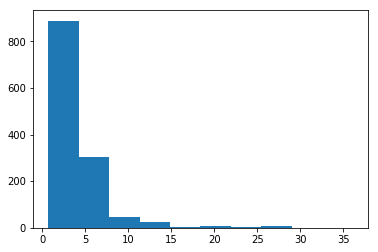

In [11]:
#------exploratory analysis-----------
#plot of MI
plt.hist(tag_MI['MI'])

In [12]:
#statistics of MI
tag_MI['MI'].describe() #there seems to be outliers, we will examine that later

count    1285.000000
mean        4.540821
std         3.065154
min         0.709000
25%         3.380000
50%         3.780000
75%         4.450000
max        36.070000
Name: MI, dtype: float64

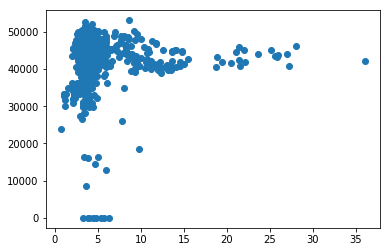

In [13]:
#scatter plot of some variables against MI
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70104'])

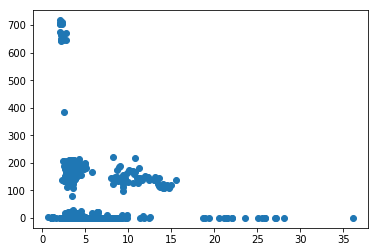

In [14]:
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70113'])

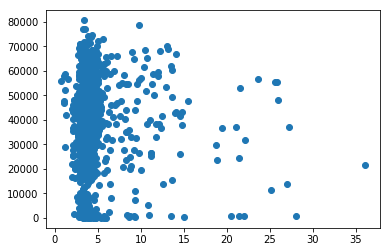

In [15]:
plt.scatter(tag_MI['MI'], tag_MI['P1:FC70116'])

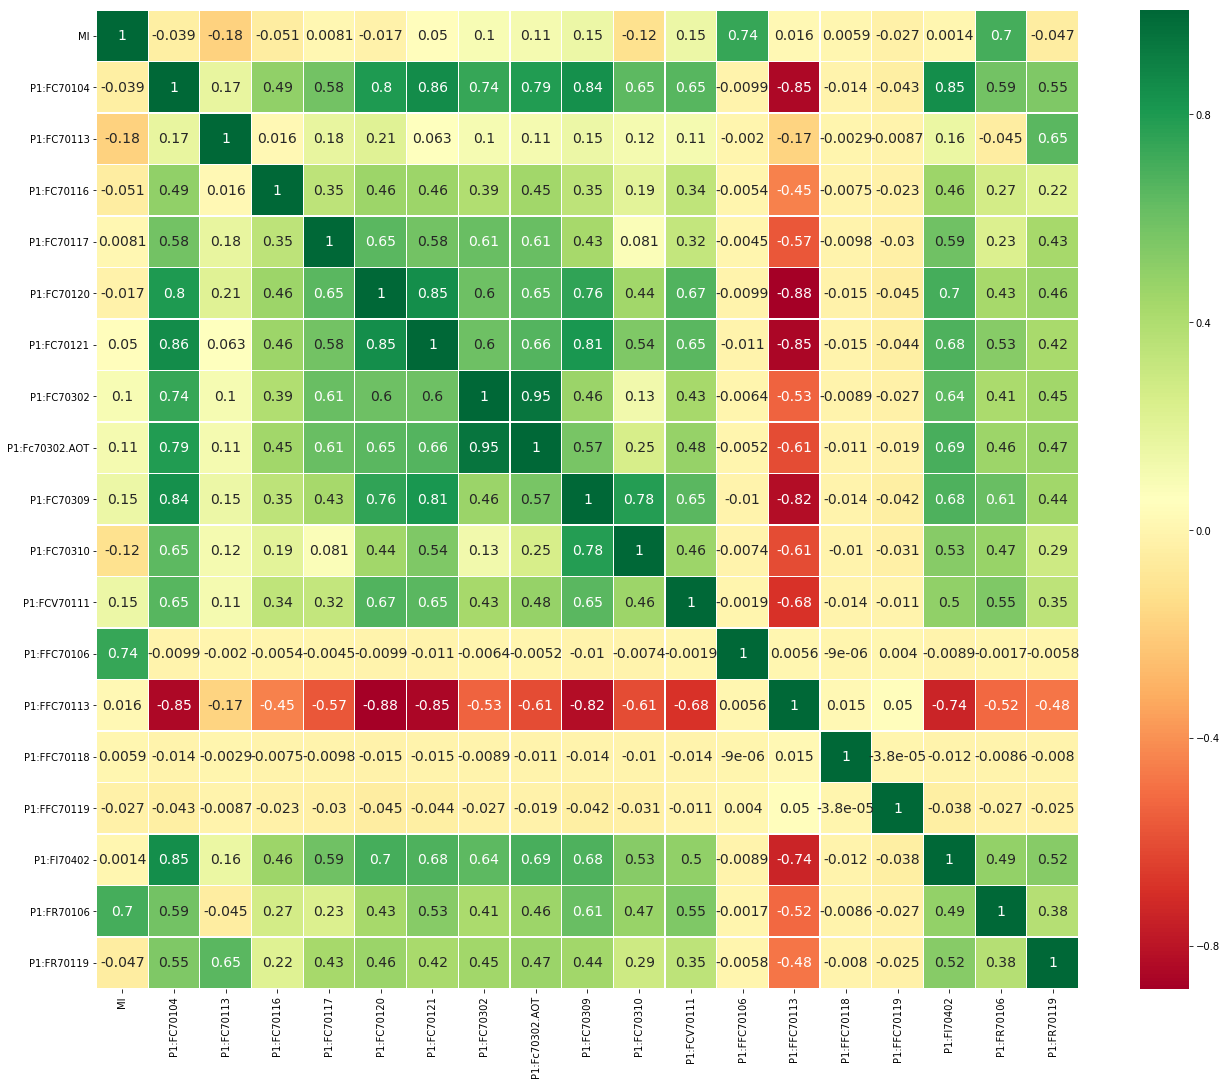

In [22]:
#heat map column 2 to 21
tag_cor1 = tag.iloc[:,2:21]
sns.heatmap(tag_cor1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

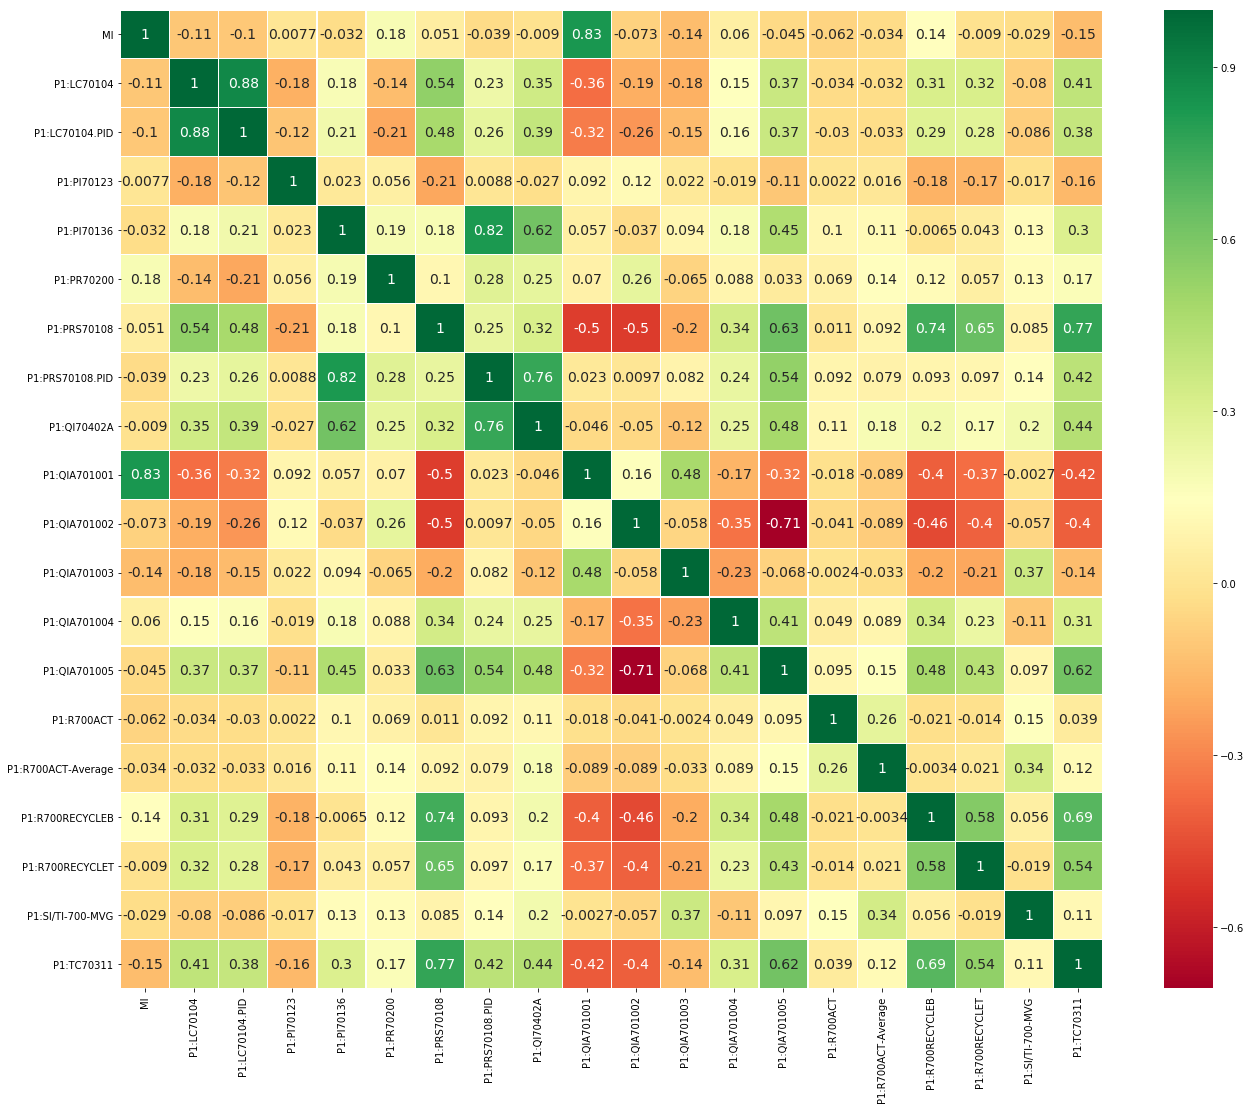

In [25]:
#heat map column 22 to 41
tag_cor2 = tag.iloc[:,np.r_[2, 22:41]]
sns.heatmap(tag_cor2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

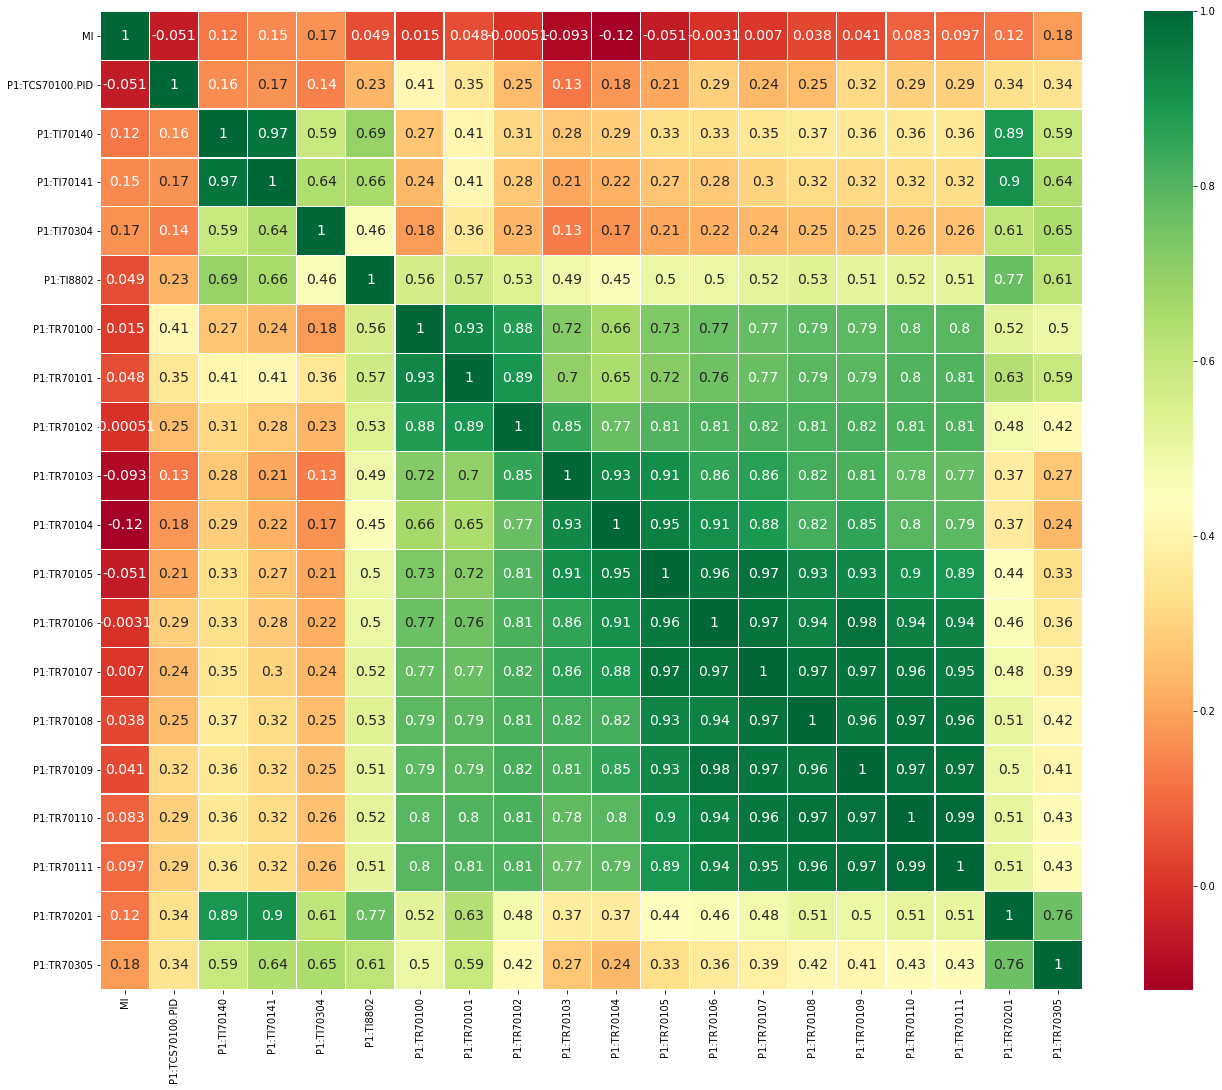

In [26]:
#heat map column 42 to 61
tag_cor3 = tag.iloc[:,np.r_[2, 42:61]]
sns.heatmap(tag_cor3.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(22,18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

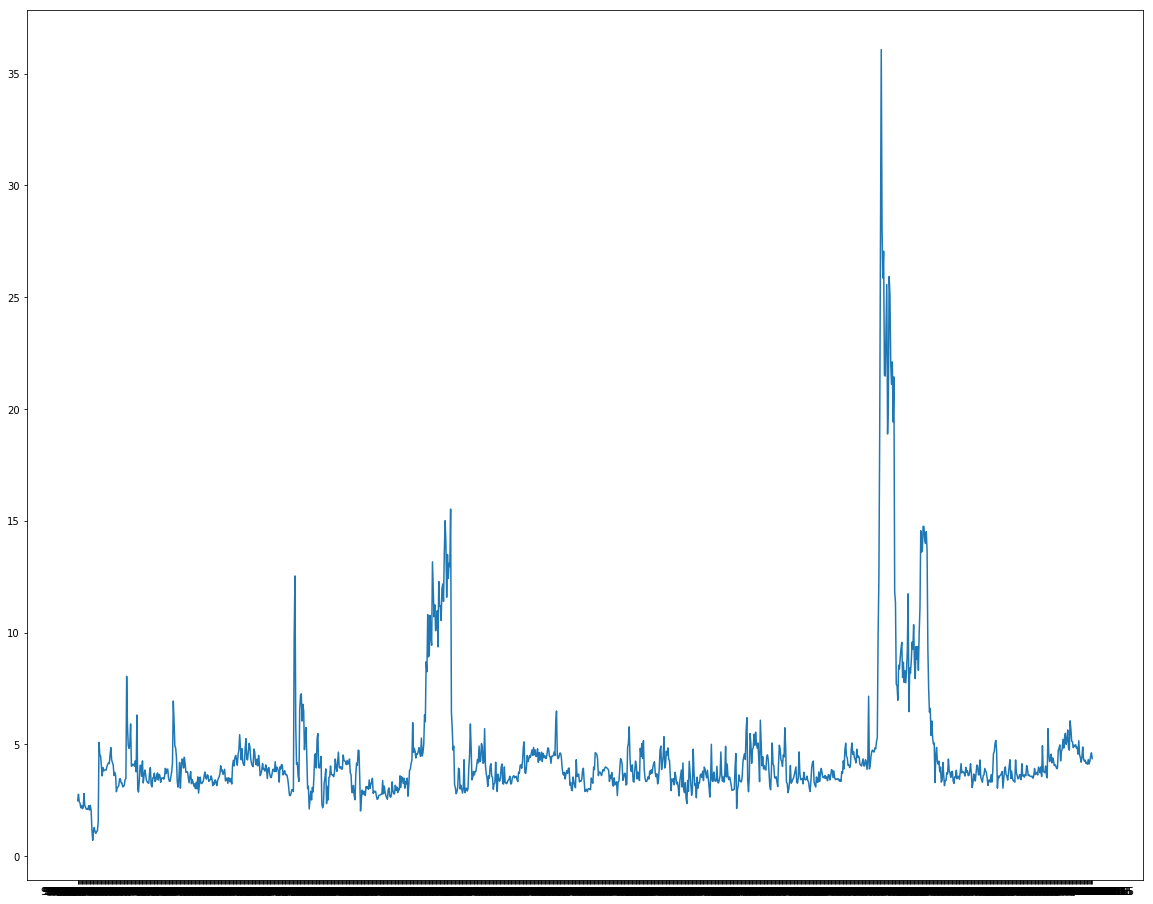

In [9]:
#time series plot of MI value
time = tag_MI['Time']
mi = tag_MI['MI']
plt.plot(time,mi)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()

In [28]:
#--------test modeling-----------

#split train and test
msk = np.random.rand(len(tag_MI)) < 0.7
train = tag_MI[msk]
test = tag_MI[~msk]

In [31]:
np.shape(train)

(896, 61)

In [32]:

#pre-processing, use all numeric predicators
X_train = train.drop(["Time", "ProGrade", "MI"],axis=1)
Y_train = train["MI"]

In [33]:
#fit linear model
lm_model = LinearRegression().fit(X_train, Y_train)

In [35]:
lm_model.score(X_train, Y_train) #check r squared value

0.918110746839903

In [34]:
tag_MI.iloc[1,0] - tag_MI.iloc[0,0]

Timedelta('0 days 04:00:00')